# 新一轮空值填充

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('datas/los_data.csv')
train = data

查看空值情况

In [4]:
def getNullCount():
    x = train.isnull().sum()
    print(x[x>0])
    x[x>0].sort_values().plot.bar()  

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


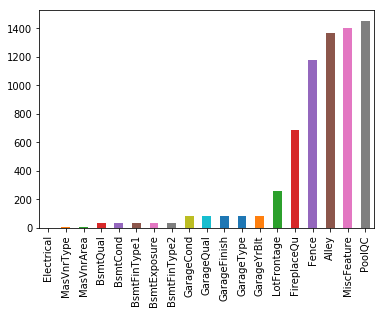

In [5]:
getNullCount()

## 1. LotFrontage 填充

### 思路1：房子宽度，是否和小区有关？和小区设计有关？

取不同的Neighborhood的均值和中位数

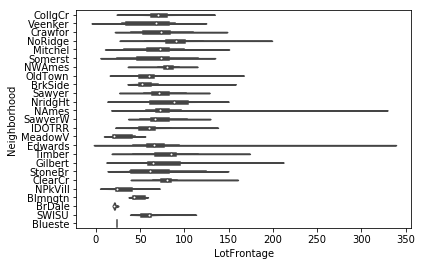

In [6]:
sns.violinplot('LotFrontage', 'Neighborhood', data=train)

In [25]:
# getNullCount()

In [7]:
neighborhood_group=train.groupby('Neighborhood')
lot_median=neighborhood_group['LotFrontage'].median()
lot_mean=neighborhood_group['LotFrontage'].mean()

In [64]:
# 对空值情况
# train[train['LotFrontage'].isnull()]['Neighborhood']

### 思路2：是否和LotArea 有关呢？

房子宽度 和 房屋面积(不缺失)


In [8]:
train['LotFrontage'].corr(train['LotArea'])

0.42609501877180833

In [9]:
train['LotFrontage'].corr(np.sqrt(train['LotArea']))

0.6020022167939361

In [10]:
# 添加1列
train['SqrtLotArea']=np.sqrt(train['LotArea'])

In [11]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,91.923882
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,97.979590
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,106.066017
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,97.724101
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,119.415242


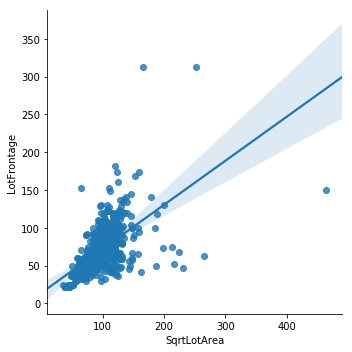

In [12]:
# 相关度较大
# 拟合的曲线 y = 0.6 * x
sns.lmplot('SqrtLotArea','LotFrontage', data=train)

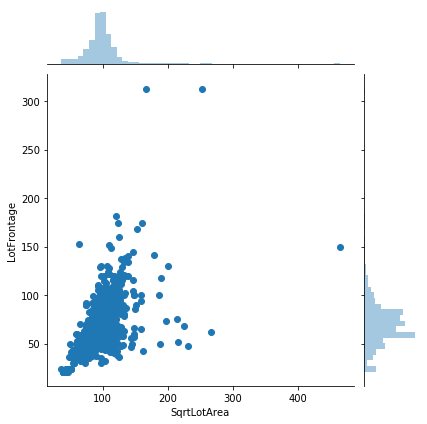

In [13]:
sns.jointplot('SqrtLotArea', 'LotFrontage', data=train)

In [14]:
# 把空值拿出来
filter = train['LotFrontage'].isnull()
train.LotFrontage[filter] = 0.6 * train.SqrtLotArea[filter]

In [15]:
train['LotFrontage'].isnull().sum()

0

<br><br>

## 2. MasVnrType 和 MasVnrArea 的填充

砖石镶板种类

In [74]:
# getNullCount()

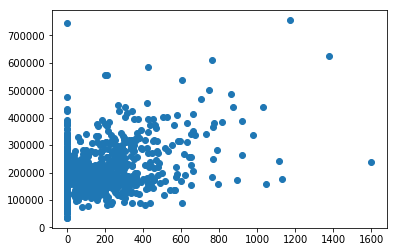

In [16]:
# MasVnrArea 和 SalePrice 的关系
# 基本没什么关系
plt.scatter(train['MasVnrArea'], train['SalePrice'])

In [17]:
train['MasVnrArea'].corr(train['SalePrice'])

0.4774930470957163

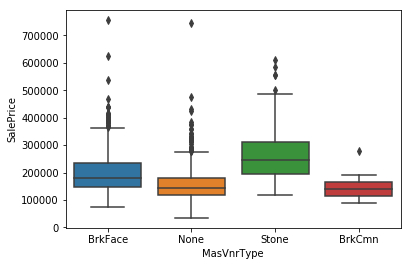

In [18]:
# 什么都没有价格也不低，相关性不太强
sns.boxplot(train['MasVnrType'], train['SalePrice'], data=train) 

In [78]:
# TypeError: unsupported operand type(s) for /: 'str' and 'int'
# train['MasVnrType'].corr(train['SalePrice'])

In [19]:
# 只有8个空值，有高频填充即可
# 进行聚类，看它 个类 有多少个
train.groupby(['MasVnrType']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
MasVnrType,,,,,,,,,,,,,,,,,,,,,
BrkCmn,15,15,15,15,15,15,0,15,15,15,...,0,7,2,15,15,15,15,15,15,15
BrkFace,445,445,445,445,445,445,10,445,445,445,...,2,80,11,445,445,445,445,445,445,445
None,864,864,864,864,864,864,77,864,864,864,...,4,188,40,864,864,864,864,864,864,864
Stone,128,128,128,128,128,128,3,128,128,128,...,1,6,1,128,128,128,128,128,128,128


In [20]:
# 把None的过滤出来
# 看 MasVnrType 和 MasVnrArea的相关性 
train[train.MasVnrType=='None'][['MasVnrType', 'MasVnrArea']].head()

,MasVnrType,MasVnrArea
1,None,0.0
3,None,0.0
5,None,0.0
8,None,0.0
9,None,0.0


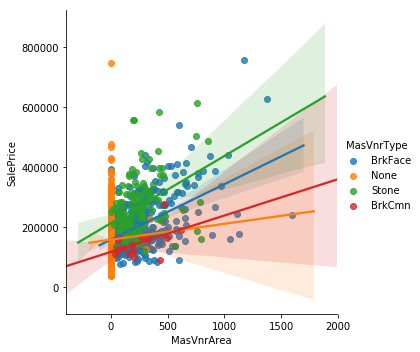

In [29]:
# 散点图 + 回归
# 斜率比较缓，相关性比较低
sns.lmplot('MasVnrArea', 'SalePrice', hue='MasVnrType', data=train) 

In [22]:
filter=train['MasVnrArea'].isnull()

In [28]:
# getNullCount()

In [23]:
(filter==True).sum()

8

In [24]:
train.MasVnrArea[filter]=0.0

In [25]:
filter=train['MasVnrType'].isnull()
train.MasVnrType[filter]='None'

后续在EDA的特征工程中，可以使用如下填充办法：

分类进行预测MasVnrType，使用回归MasVnrAre

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


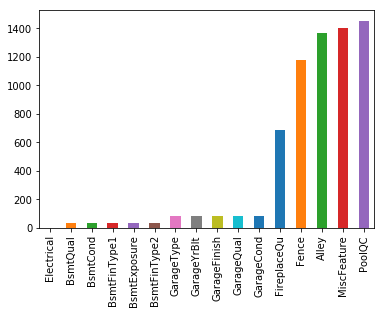

In [26]:
getNullCount()

<br><br>

## 3. Electrical的填充

电力系统，保险丝、空气匝

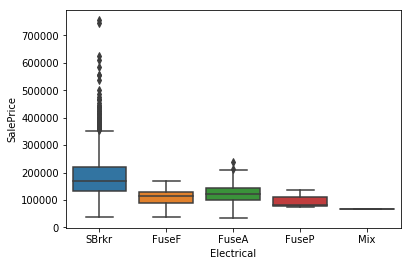

In [30]:
# 先看和真正目标的 有多大的相关性
sns.boxplot('Electrical', 'SalePrice', data=train)

In [35]:
# 统计下，用众数填充
train.groupby('Electrical').count() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,94,94,94,94,94,94,12,94,94,94,...,0,23,2,94,94,94,94,94,94,94
FuseF,27,27,27,27,27,27,4,27,27,27,...,0,2,0,27,27,27,27,27,27,27
FuseP,3,3,3,3,3,3,2,3,3,3,...,0,0,0,3,3,3,3,3,3,3
Mix,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,1,1,1,1
SBrkr,1334,1334,1334,1334,1334,1334,73,1334,1334,1334,...,7,256,52,1334,1334,1334,1334,1334,1334,1334


In [48]:
# 用众数，在朴素贝叶斯中概率也大，用其它的分类模型学习它的数量已经决定它的可能性了
# 数量上已经不均衡了
filter=train['Electrical'].isnull()
train.Electrical[filter]='SBrkr'

In [50]:
# getNullCount()

<br><br>

## 4. Alley 小路 的填充

EDA 后半段考虑删掉

80%以上是空值，可以删除了

In [31]:
# 小巷的数据分布，只有2个
# 推断 NA不填 本身就是None
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [ ]:
# train['Alley'].value_counts() 与groupby().count()效果一样？

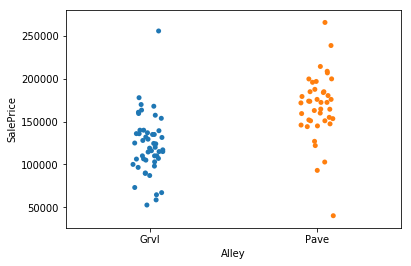

In [32]:
sns.stripplot('Alley', 'SalePrice', data=train)

In [33]:
# 大概率都是None
train['Alley']=train['Alley'].fillna('None')

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


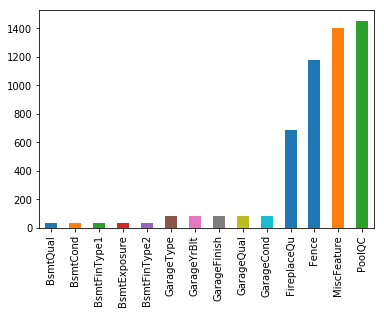

In [47]:
getNullCount()

<br><br>

## 5.BaseMent 群填充

TotalBsmtSF 是一个完整的关于Basement的列，可以拿出来与SalePrice相关性分析

In [34]:
# train.columns

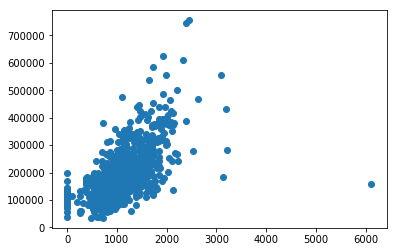

In [35]:
# 本身和房价做分析，相关性挺高
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])

In [55]:
# 未缺失的值 和 房价做分析
basement_cols=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
# 把为空的 筛选出来
# 代表没有地下室
print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

Empty DataFrame
Columns: [BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF]
Index: []


In [43]:
# train[basement_cols+['TotalBsmtSF']]
# [train['BsmtQual'].isnull()==True]

In [45]:
# 本身没有地下室填 NA的，偷懒没有填
train[train.BsmtCond=='NA']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SqrtLotArea


In [46]:
for col in basement_cols:
    if 'FinSF' not in col:
        train[col]=train[col].fillna('None')

FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


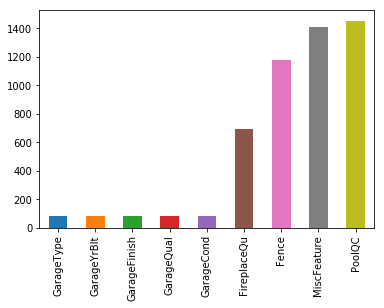

In [51]:
getNullCount()

<br><br>

## 6.FireplaceQu填充

火炉

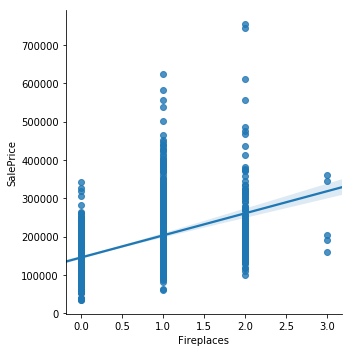

In [58]:
sns.lmplot('Fireplaces', 'SalePrice', data=train)

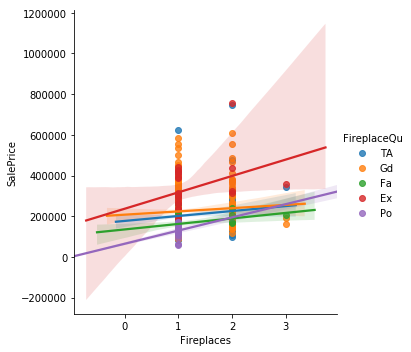

In [59]:
sns.lmplot('Fireplaces', 'SalePrice', data=train, hue='FireplaceQu')

In [60]:
# 上图只给了5个类型，快查表中有6类包括None，推断少了一类None
train['FireplaceQu']=train['FireplaceQu'].fillna('None')

GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


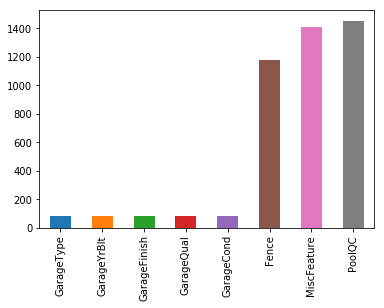

In [61]:
getNullCount()

<br><br>

## 7.Carage 车库列群填充

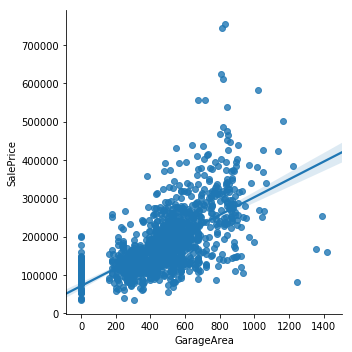

In [62]:
# 相关性，跟房价关系挺大的
sns.lmplot('GarageArea', 'SalePrice', data=train)

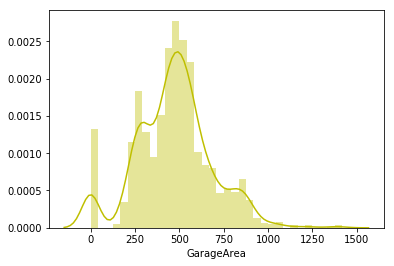

In [63]:
# 分布，拟正太分布，本身特征的分布
# 核概率分布曲线 
sns.distplot(train['GarageArea'], color='y', kde=True)

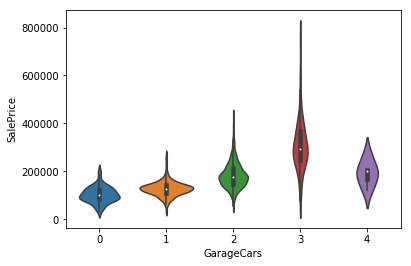

In [64]:
# 能放多少量车，3个车位
sns.violinplot(train['GarageCars'], train['SalePrice'])

In [68]:
# train.columns

In [69]:
garage_cols=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars','GarageArea']

In [70]:
train[garage_cols][train['GarageType'].isnull()].head()
# print(train[basement_cols+['TotalBsmtSF']][train['BsmtQual'].isnull()==True])

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,NaN,0,0


In [72]:
for col in garage_cols:
    if train[col].dtype==np.object:
        train[col]=train[col].fillna('None')
    else:
        train[col]=train[col].fillna(0)

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


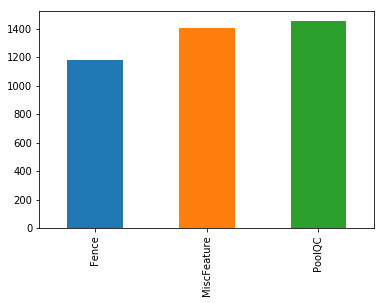

In [73]:
getNullCount()

<br><br>

## 8.PoolQC 泳池质量 填充

In [77]:
train.filter(like='Pool', axis=1).head()

,PoolArea,PoolQC
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN


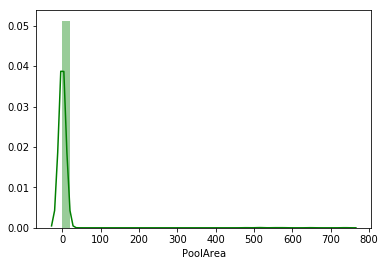

In [74]:
sns.distplot(train['PoolArea'], color='g', kde=True)

In [78]:
# 根本没有泳池
train.PoolQC=train['PoolQC'].fillna('None')

Fence          1179
MiscFeature    1406
dtype: int64


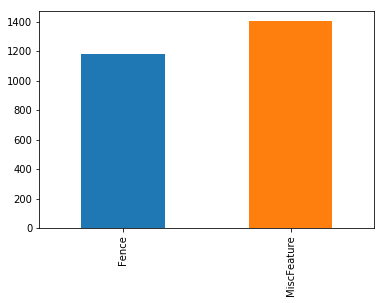

In [79]:
getNullCount()

<br><br>

## 9.Fence 围栏填充

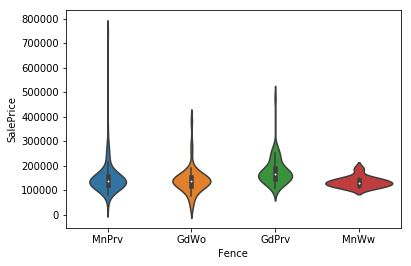

In [80]:
sns.violinplot(train['Fence'], train['SalePrice'])

总共有5个类型，然而可以统计出来的类型一共只有4类，可以断定最后一类NA用空值代替了

有没有围栏，价格都差不多

In [81]:
train.Fence = train['Fence'].fillna('None')

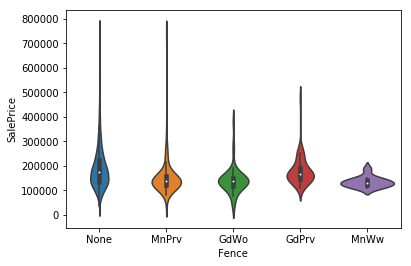

In [84]:
# 回看填充后的数据分布 与 SalePrice的关系
sns.violinplot(train['Fence'], train['SalePrice'])

MiscFeature    1406
dtype: int64


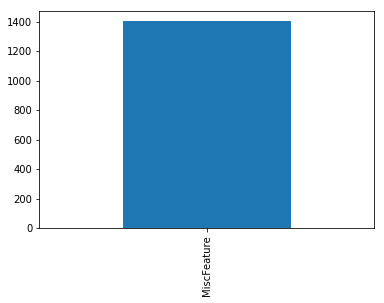

In [83]:
getNullCount()

<br><br>

## 10.MiscFeature 其余特征，备注特征填充

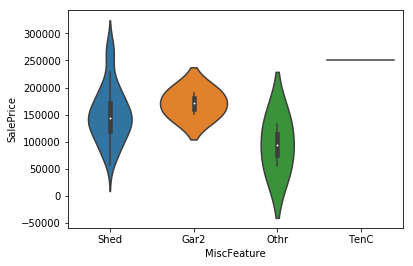

In [85]:
# 看看它的类型与 SalePrice 全不全
sns.violinplot(train['MiscFeature'], train['SalePrice'])

因为MiscFeature本来有5类，然而只统计出四类，因此可以断定第五类NA其实是空值代表的

In [86]:
train.MiscFeature = train['MiscFeature'].fillna('None')

In [88]:
# getNullCount() 没空值了

<br><br>

## 保存空值处理后的数据

In [93]:
train.to_csv('datas/house_data.csv')